In [185]:
import glob, os
import pandas as pd

In [186]:
files = glob.glob("data/*.csv")
files

['data\\gdp_per_capita.csv',
 'data\\life_expectancy_years.csv',
 'data\\population_total.csv']

In [187]:
urls = {'Life Expectancy' : 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--datapoints--life_expectancy_at_birth--by--geo--time.csv',
       'Total Population' : 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--population_historic/master/ddf--datapoints--population_total--by--geo--time.csv',
       'GDP Per Capita' : 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--gdp_per_capita_cppp/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv'}

In [188]:
urls.items()

dict_items([('Life Expectancy', 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--datapoints--life_expectancy_at_birth--by--geo--time.csv'), ('Total Population', 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--population_historic/master/ddf--datapoints--population_total--by--geo--time.csv'), ('GDP Per Capita', 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--gdp_per_capita_cppp/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')])

In [189]:
d = {}

for url in urls.items():
    d[url[0]] = pd.read_csv(url[1])
    d[url[0]].set_index(["time", "geo"], inplace=True)

In [190]:
d['Life Expectancy']

,,life_expectancy_at_birth
time,geo,
1800,afg,28.21
1801,afg,28.20
1802,afg,28.19
1803,afg,28.18
1804,afg,28.17
...,...,...
2096,zwe,73.91
2097,zwe,74.04
2098,zwe,74.17


In [191]:
d['GDP Per Capita']

,,income_per_person_gdppercapita_ppp_inflation_adjusted
time,geo,
1800,afg,674
1801,afg,674
1802,afg,674
1803,afg,674
1804,afg,674
...,...,...
2046,zwe,3881
2047,zwe,3963
2048,zwe,4047


In [192]:
d['Total Population']

,,population_total
time,geo,
1800,afg,3280000
1801,afg,3280000
1802,afg,3280000
1803,afg,3280000
1804,afg,3280000
...,...,...
2096,zwe,30940779
2097,zwe,30952208
2098,zwe,30959811


In [193]:
pd.merge(d['Life Expectancy'], d['GDP Per Capita'], left_index=True, right_index=True)

,,life_expectancy_at_birth,income_per_person_gdppercapita_ppp_inflation_adjusted
time,geo,,
1800,afg,28.21,674
1801,afg,28.20,674
1802,afg,28.19,674
1803,afg,28.18,674
1804,afg,28.17,674
...,...,...,...
2046,zwe,66.89,3881
2047,zwe,67.07,3963
2048,zwe,67.25,4047


In [194]:
from functools import reduce

In [195]:
merged_df = reduce(lambda l, r: pd.merge(l, r, left_index=True, right_index=True), d.values())


In [196]:
country_info = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--population_historic/master/ddf--entities--geo--country.csv")

In [197]:
country_info.head()

,country,g77_and_oecd_countries,income_groups,is--country,iso3166_1_alpha2,unicode_region_subtag,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,name,un_state,world_4region,world_6region,unicef_region,income_3groups,un_sdg_region,un_sdg_ldc,unhcr_region,west_and_rest
0,abkh,others,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,...,Abkhazia,False,europe,europe_central_asia,NaN,NaN,NaN,NaN,NaN,NaN
1,abw,others,high_income,True,AW,AW,ABW,533.0,NaN,coastline,...,Aruba,False,americas,america,NaN,high_income,un_latin_america_and_the_caribbean,un_not_least_developed,unhcr_americas,NaN
2,afg,g77,low_income,True,AF,AF,AFG,4.0,NaN,landlocked,...,Afghanistan,True,asia,south_asia,sa,low_income,un_central_and_southern_asia,un_least_developed,unhcr_asia_pacific,rest
3,ago,g77,lower_middle_income,True,AO,AO,AGO,24.0,NaN,coastline,...,Angola,True,africa,sub_saharan_africa,ssa,middle_income,un_sub_saharan_africa,un_least_developed,unhcr_southern_africa,rest
4,aia,others,NaN,True,AI,AI,AIA,660.0,NaN,coastline,...,Anguilla,False,americas,america,NaN,NaN,un_latin_america_and_the_caribbean,un_not_least_developed,unhcr_americas,NaN


In [198]:
country_df = country_info[['country', 'iso3166_1_alpha3', 'name', 'world_4region']]

In [199]:
country_df = country_df.dropna()

In [200]:
country_df['iso3166_1_alpha3'] = country_df['iso3166_1_alpha3'].apply(lambda x: str(x).lower())

In [201]:
country_df.head()

,country,iso3166_1_alpha3,name,world_4region
1,abw,abw,Aruba,americas
2,afg,afg,Afghanistan,asia
3,ago,ago,Angola,africa
4,aia,aia,Anguilla,americas
6,ala,ala,Åland,europe


In [202]:
country_df.set_index("iso3166_1_alpha3", inplace = True)


In [203]:
country_df.index.names=['geo']

In [204]:
country_df.head()

,country,name,world_4region
geo,,,
abw,abw,Aruba,americas
afg,afg,Afghanistan,asia
ago,ago,Angola,africa
aia,aia,Anguilla,americas
ala,ala,Åland,europe


In [205]:
final_df = pd.merge(merged_df, country_df, left_index=True, right_index=True)

In [206]:
final_df.head()

,,life_expectancy_at_birth,population_total,income_per_person_gdppercapita_ppp_inflation_adjusted,country,name,world_4region
time,geo,,,,,,
1800,afg,28.21,3280000,674,afg,Afghanistan,asia
1801,afg,28.20,3280000,674,afg,Afghanistan,asia
1802,afg,28.19,3280000,674,afg,Afghanistan,asia
1803,afg,28.18,3280000,674,afg,Afghanistan,asia
1804,afg,28.17,3280000,674,afg,Afghanistan,asia


In [207]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 47316 entries, (1800, 'afg') to (2050, 'zwe')
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   life_expectancy_at_birth                               47316 non-null  float64
 1   population_total                                       47316 non-null  int64  
 2   income_per_person_gdppercapita_ppp_inflation_adjusted  47316 non-null  int64  
 3   country                                                47316 non-null  object 
 4   name                                                   47316 non-null  object 
 5   world_4region                                          47316 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ MB


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
final_df.loc[2020]

,life_expectancy_at_birth,population_total,income_per_person_gdppercapita_ppp_inflation_adjusted
geo,,,
afg,63.39,38928341,1918
alb,77.90,2877800,13265
dza,76.20,43851043,10624
ago,65.20,32866268,6219
atg,76.25,97928,17859
...,...,...,...
ven,75.10,28435943,5796
vnm,74.51,97338583,8197
yem,67.76,29825968,2419


In [171]:
final_df.loc[1800+1]

,life_expectancy_at_birth,population_total,income_per_person_gdppercapita_ppp_inflation_adjusted,country,name,world_4region
geo,,,,,,
afg,28.20,3280000,674,afg,Afghanistan,asia
alb,35.40,401773,746,alb,Albania,europe
dza,28.82,2509126,788,dza,Algeria,africa
ago,26.98,1567028,693,ago,Angola,africa
atg,33.54,37000,846,atg,Antigua and Barbuda,americas
...,...,...,...,...,...,...
ven,32.20,978177,1228,ven,Venezuela,americas
vnm,32.00,4099892,966,vnm,Vietnam,asia
yem,23.39,2593000,983,yem,Yemen,asia


<AxesSubplot:xlabel='income_per_person_gdppercapita_ppp_inflation_adjusted', ylabel='life_expectancy_at_birth'>

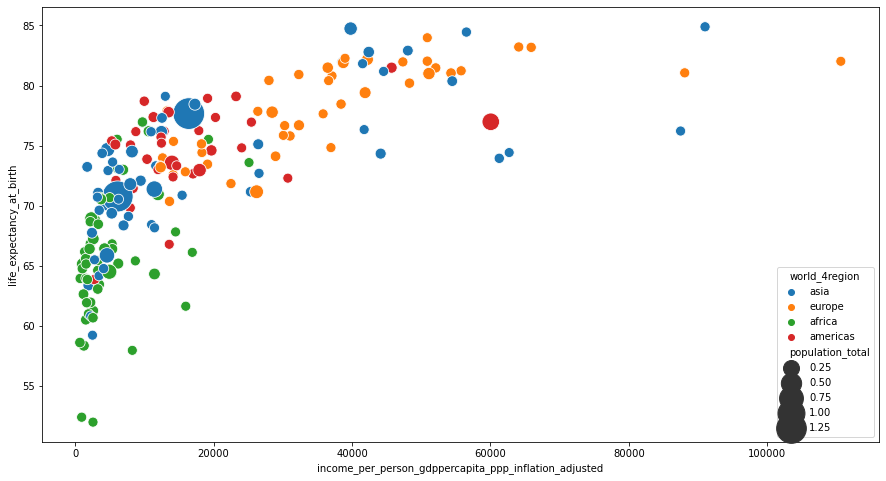

In [209]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = final_df.loc[2020], y = "life_expectancy_at_birth", x = "income_per_person_gdppercapita_ppp_inflation_adjusted", size = "population_total", sizes=(100,1000), hue = "world_4region")

In [163]:
import matplotlib
import matplotlib.animation as animation

In [164]:
%matplotlib notebook

In [180]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
fig = plt.figure(figsize=(15,8))
# plt.xlim(final_df['income_per_person_gdppercapita_ppp_inflation_adjusted'].min(), final_df['income_per_person_gdppercapita_ppp_inflation_adjusted'].max())
# plt.ylim(final_df['life_expectancy_at_birth'].min(), final_df['life_expectancy_at_birth'].max())
plt.xlabel('GDP Per Capita',fontsize=20)
plt.ylabel('Life Expectancy at birth',fontsize=20)

def animate(i):
    data = final_df.loc[1950+i] #select data range
    p = sns.scatterplot(data = data, y = "life_expectancy_at_birth", x = "income_per_person_gdppercapita_ppp_inflation_adjusted", size = "population_total", sizes=(100,1000), hue = "world_4region")
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=200, repeat=True)

In [ ]:
ani.save("test.mp4")

In [210]:
import plotly_express as px

In [213]:
px.data.gapminder().head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


# Plotly express

In [216]:
plotly_df = final_df.reset_index()
plotly_df.head()

,time,geo,life_expectancy_at_birth,population_total,income_per_person_gdppercapita_ppp_inflation_adjusted,country,name,world_4region
0,1800,afg,28.21,3280000,674,afg,Afghanistan,asia
1,1801,afg,28.20,3280000,674,afg,Afghanistan,asia
2,1802,afg,28.19,3280000,674,afg,Afghanistan,asia
3,1803,afg,28.18,3280000,674,afg,Afghanistan,asia
4,1804,afg,28.17,3280000,674,afg,Afghanistan,asia


In [233]:
plotly_df['life_expectancy_at_birth'].isnull().values.any()

False

In [232]:
px.scatter(plotly_df[plotly_df['time'].isin([*range(1950,2020)])], x="income_per_person_gdppercapita_ppp_inflation_adjusted", y="life_expectancy_at_birth", animation_frame="time", animation_group="name",
           size="population_total", color="world_4region", hover_name="name", 
           log_x = True, 
           size_max=45, range_x=[100,100000], range_y=[25,90])